In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [212]:
# df=pd.read_excel('appdata.xlsx') 

Dataset for TRaining **Durting train uncomment**

In [294]:
 df=pd.read_csv('test_appdata.csv')

Dataset for Testing **Durting train comment**

In [295]:
df.head()

,timeElapsed,x,y,z,label
0,0,0.75,-9.53,1.04,Standing
1,1,0.76,-9.55,1.05,Standing
2,2,0.77,-9.53,1.05,Standing
3,3,0.80,-9.53,1.01,Standing
4,4,0.87,-9.55,1.03,Standing


In [296]:
df.isnull().sum()

timeElapsed    0
x              0
y              0
z              0
label          0
dtype: int64

In [297]:
df.dropna(inplace=True)

In [298]:
df.duplicated().sum()

0

In [299]:
df.shape

(275601, 5)

In [300]:
df['label'].unique()

array(['Standing', 'Sitting', 'Walking', 'Upstairs', 'Downstairs'],
      dtype=object)

In [301]:
df['label'].value_counts()

Walking       100033
Sitting        65999
Upstairs       43094
Standing       39033
Downstairs     27442
Name: label, dtype: int64

In [302]:
df['x'].min()

-20.91

## Plot Axies of Accelerometer Dataset 

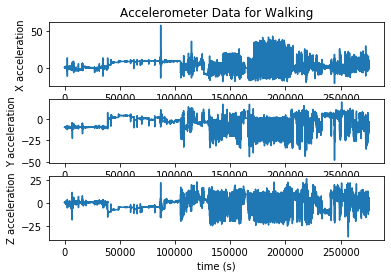

<Figure size 720x720 with 0 Axes>

In [303]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [304]:
X_acc=df['x'].values
Y_acc=df['y'].values
Z_acc=df['z'].values


In [305]:
def Filter (Data):
        a=0.05  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [306]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

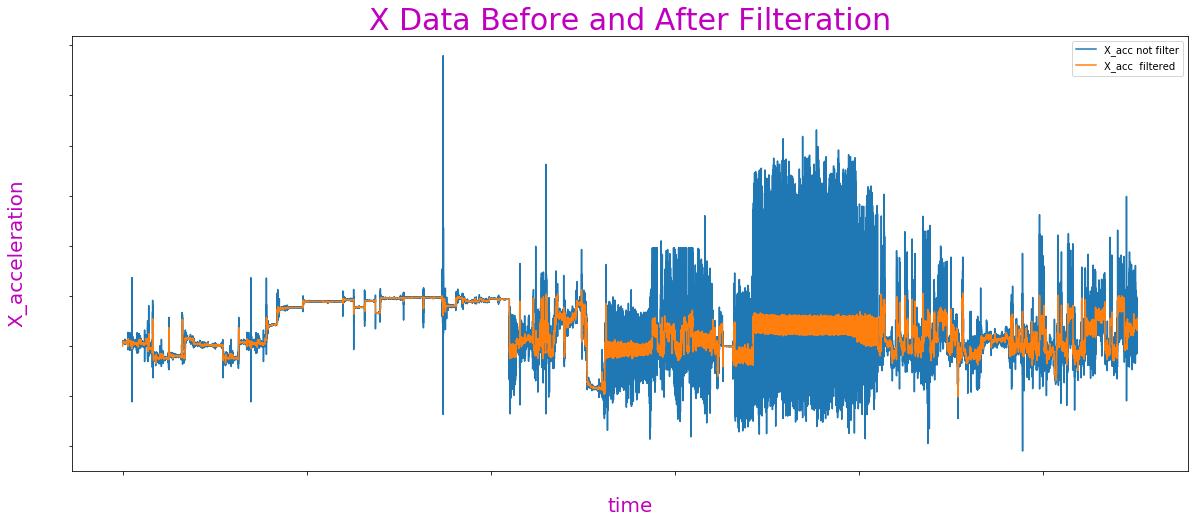

In [307]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('X_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


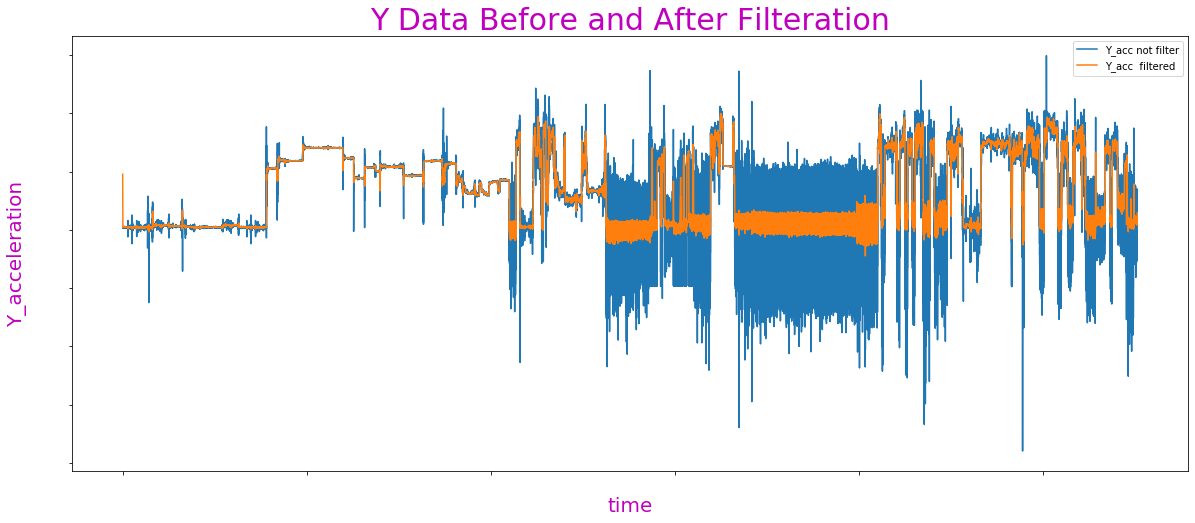

In [308]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Y_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()

plt.show()

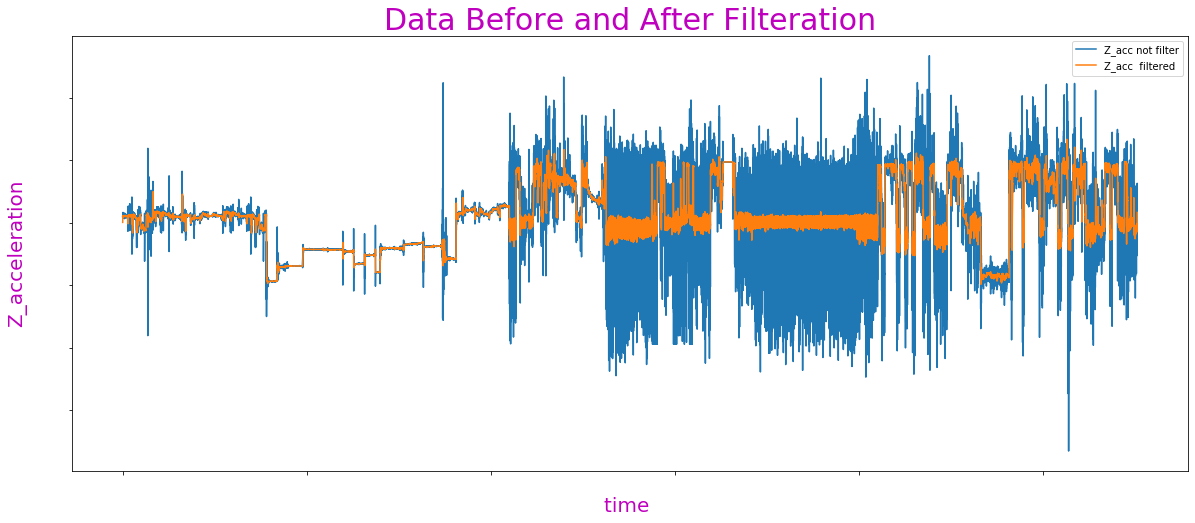

In [309]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Z_acceleration',color='m',fontsize=20)
plt.xlabel('time ',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [310]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 7)
Y_smoothed = gaussian_filter1d(Y_filtered, 7)
Z_smoothed = gaussian_filter1d(Z_filtered, 7)


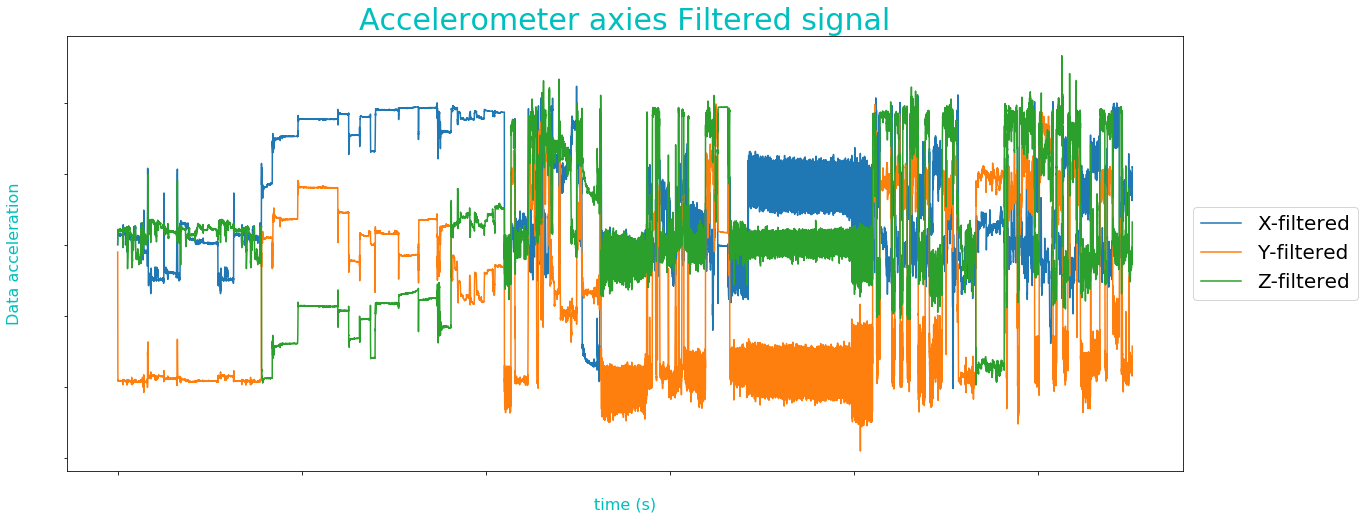

In [311]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='c',fontsize=30)
plt.ylabel('Data acceleration',color='c',fontsize=16)
plt.xlabel('time (s)',color='c',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

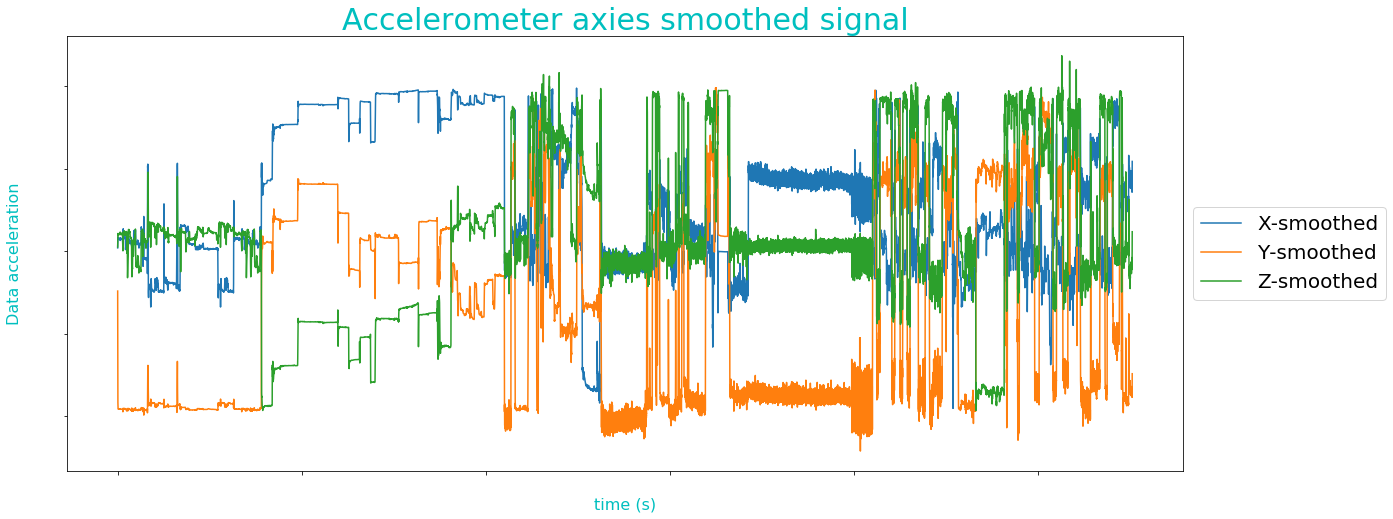

In [312]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='c',fontsize=30)
plt.ylabel('Data acceleration',color='c',fontsize=16)
plt.xlabel('time (s)',color='c',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

In [313]:
df['X_smoothed']=X_smoothed
df['Y_smoothed']=Y_smoothed
df['Z_smoothed']=Z_smoothed
df.head()

,timeElapsed,x,y,z,label,X_smoothed,Y_smoothed,Z_smoothed
0,0,0.75,-9.53,1.04,Standing,0.202521,-2.412623,0.255351
1,1,0.76,-9.55,1.05,Standing,0.205420,-2.448068,0.259042
2,2,0.77,-9.53,1.05,Standing,0.211128,-2.517962,0.266327
3,3,0.80,-9.53,1.01,Standing,0.219471,-2.620374,0.277016
4,4,0.87,-9.55,1.03,Standing,0.230201,-2.752555,0.290843


### Segmenation Process

In [314]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['X_smoothed'].values[i: i + 100]
    ys = df['Y_smoothed'].values[i: i + 100]
    zs = df['Z_smoothed'].values[i: i + 100]
    label = stats.mode(df['label'][i: i + 50])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [315]:
X_train.head()

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,avg_result_accl,sma
0,0.631112,-7.759395,0.848032,0.176316,2.133274,0.239101,0.143790,1.730983,0.194170,0.202521,...,1.262705,-1.249653,0.006289,0.297529,0.252260,0.429390,64.759073,0.776328,7.831095,9.238540
1,0.779317,-9.418435,1.013042,0.031055,0.188025,0.038683,0.024579,0.147173,0.032753,0.700668,...,1.536400,-0.021565,-0.110247,1.383464,-1.081326,0.608299,88.742272,1.027750,9.504869,11.210794
2,0.810572,-9.553475,1.013334,0.028620,0.013010,0.037854,0.024499,0.009520,0.032923,0.755933,...,1.753287,-0.224511,-0.981572,2.582724,-1.117211,0.657846,91.269062,1.028279,9.641319,11.377382
3,0.798395,-9.564263,1.020915,0.033424,0.004488,0.018701,0.029481,0.003937,0.011874,0.747644,...,0.730379,-1.704009,-1.402671,-0.934900,2.680392,0.638552,91.475141,1.042617,9.651751,11.383572
4,0.759509,-9.567032,1.034049,0.014421,0.001537,0.012237,0.012253,0.001255,0.011080,0.747644,...,0.775217,0.193405,-0.229024,-0.368300,-1.518533,0.577061,91.528105,1.069408,9.652698,11.360590


In [316]:
df_New=X_train


In [317]:
X=X_train
y=np.array(train_labels)

In [318]:
X.shape

(5511, 50)

In [319]:
y.shape

(5511,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [239]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (9094, 50)
X_test_shape ----> (3898, 50)
Y_train_shape ----> (9094,)
Y_test_shape ----> (3898,)


During train uncomment this cell

### Preprocessimg label data and feature

In [320]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# y_labeled=le.fit_transform(y_train)
# y_labeled_test=le.transform(y_test)
# Y_all=le.transform(y)
y_independent=le.fit_transform(y)
y_independent.shape

(5511,)

In [249]:
z=le.inverse_transform(np.unique(y_labeled))


In [250]:
z

array(['Downstairs', 'Sitting', 'Standing', 'Upstairs', 'Walking'],
      dtype='<U10')

During train uncomment this line and change y to y_train

In [321]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# x_Scaler_train=sc.fit_transform(X_train)
# x_Scaler_test=sc.transform(X_test)
# X_all=sc.transform(X)
x_independent=sc.fit_transform(X)
x_independent.shape

(5511, 50)

During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [244]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())




Cross validation for train data SVC is :  0.7349116569963324


During train uncomment this cell

Confusion matrix is :
  [[ 212    0    1  132   17]
 [   1  952    0    2    0]
 [   1    0  594    3    1]
 [  47    0    6  452   62]
 [  37    0    1  112 1265]]


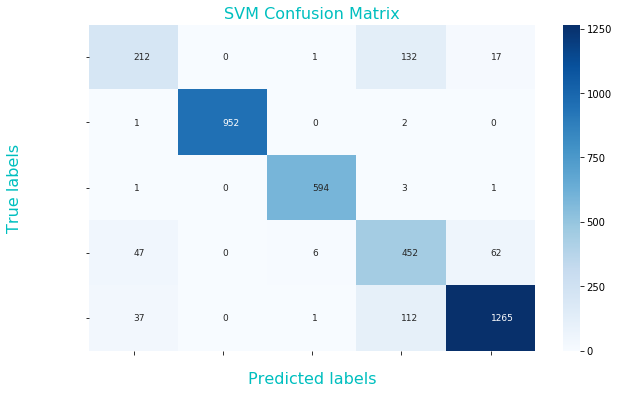

In [245]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using KNN Classification

In [246]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=1).fit(x_Scaler_train, y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
n_neighbors_n = acc.index(max(acc) )      
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.9014879425346332 at K = 7


In [247]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = n_neighbors_n, metric = 'minkowski', p = 1)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN ,  X_all , Y_all, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train.mean())



# cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data KNN is : ", cv_knn_test.mean())


Cross validation for train data KNN is :  0.7177497067616264


During train uncomment this cell

Confusion matrix is :
  [[ 271    0    0   65   26]
 [   1  953    0    1    0]
 [   0    0  594    3    2]
 [ 103    0    5  390   69]
 [  49    0    0   66 1300]]


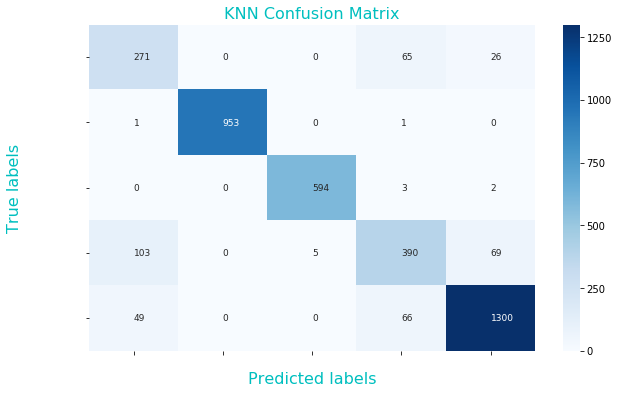

In [252]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('KNN Confusion Matrix',fontsize=16,color='c') 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);


During train uncomment this cell

### Using Random forest Classifier

In [253]:
acc = []
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1,50):
    neigh = RandomForestClassifier(n_estimators =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
n_estimators_n= acc.index(max(acc) )      
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.9143150333504361 at K = 46


In [254]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = n_estimators_n, criterion = 'entropy',random_state=49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , X_all , Y_all, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())
# cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data RF is : ", cv_rf_test.mean())



Cross validation for train data RF is :  0.7007415255931911


During train uncomment this cell

Confusion matrix is :
  [[ 266    0    0   76   20]
 [   1  954    0    0    0]
 [   4    0  591    1    3]
 [  66    0    4  443   54]
 [  45    0    0   67 1303]]


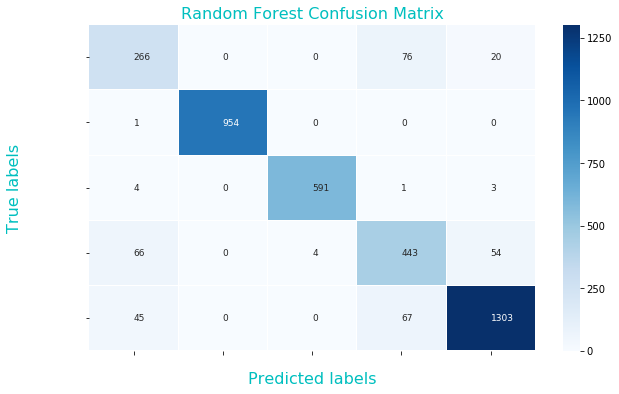

In [255]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True,linewidths = 0.1, fmt='d', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Random Forest Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Decision Tree Classifier

In [256]:
acc = []
from sklearn import tree
from sklearn import metrics
for i in range(1,50):
    neigh = tree.DecisionTreeClassifier(max_depth  =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
max_depth_n= acc.index(max(acc))   
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8866085171883017 at K = 10


In [257]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = max_depth_n,criterion = 'entropy',random_state=49)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT ,  X_all , Y_all, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train.mean())
# cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data DT is : ", cv_dt_test.mean())


Cross validation for train data DT is :  0.6498589309681585


During train uncomment this cell

Confusion matrix is :
  [[ 209    1    0  138   14]
 [   0  951    0    1    3]
 [   5    0  586    6    2]
 [  83    2   11  422   49]
 [  62    0    2  103 1248]]


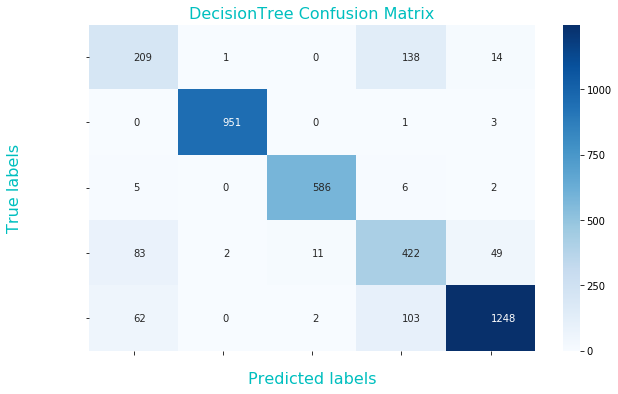

In [258]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 10}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('DecisionTree Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [259]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB ,  X_all , Y_all, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train.mean())



Cross validation for train data NB is :  0.65371376913026


During train uncomment this cell

Confusion matrix is :
  [[ 133    1   49  107   72]
 [   0  937   11    7    0]
 [   9    0  579    1   10]
 [ 157    9   23  217  161]
 [  71   45  204   86 1009]]


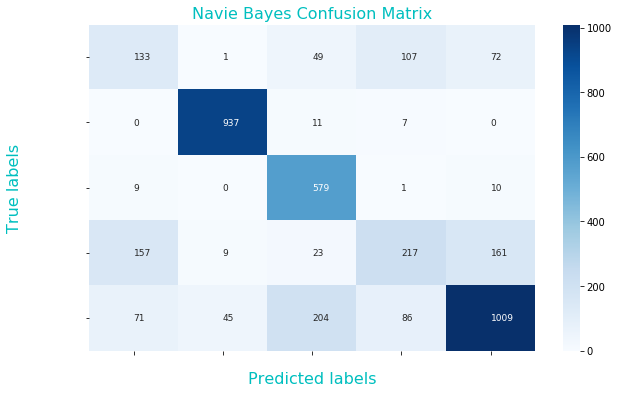

In [260]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Navie Bayes Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

In [261]:
from sklearn.linear_model import LogisticRegression
rf = RandomForestClassifier(n_estimators=n_estimators_n, random_state=1)
knn = KNeighborsClassifier(n_neighbors = n_neighbors_n, metric = 'minkowski', p = 1)
dt = tree.DecisionTreeClassifier(max_depth = max_depth_n,criterion = 'entropy',random_state=49)
svm = SVC(kernel = 'rbf')
nb = GaussianNB()
lr = LogisticRegression(multi_class='multinomial', random_state=1)
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('svm', svm), ('knn', knn),('lr',lr), ('rf', rf),('dt',dt),('nb',nb)], voting='hard')
final_model.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(final_model , X_all , Y_all, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())

Cross validation for train data RF is :  0.7385301625373336


Confusion matrix is :
  [[ 260    0    0   87   15]
 [   1  953    0    1    0]
 [   2    0  592    3    2]
 [  75    0    6  429   57]
 [  51    0    2   80 1282]]


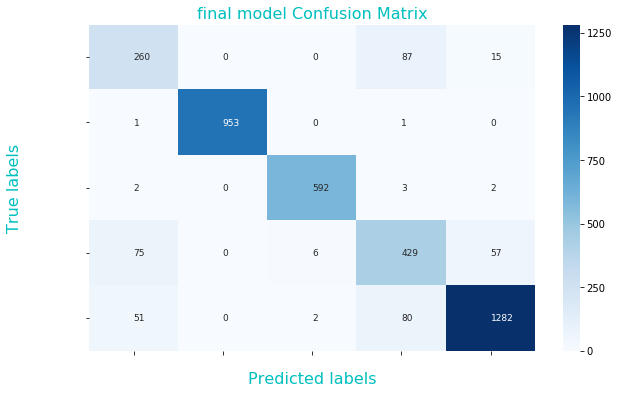

In [262]:
pred_final = final_model.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, pred_final)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('final model Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [263]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  
print('Accuracy of final model  --------->',round(accuracy_score(y_labeled_test, pred_final),2))  

Accuracy of SVC          ---------> 0.89
Accuracy of Desicion Tree---------> 0.88
Accuracy of Random forest---------> 0.91
Accuracy of KNN          ---------> 0.9
Accuracy of Navie Bayes  ---------> 0.74
Accuracy of final model  ---------> 0.9


In [346]:
# import joblib
 
# # Save the model as a pickle in a file
# joblib.dump(classifier_RF, 'RandomForest.pkl')
# joblib.dump(classifier_NB, 'naviebayes.pkl')
# joblib.dump(classifier_DT, 'descisiontree.pkl')
# joblib.dump(classifier_SVC, 'svc.pkl')
# joblib.dump(classifier_KNN, 'knn.pkl')


['knn.pkl']

In [410]:
# # Load the model from the file
# import joblib
# rf_from_joblib = joblib.load('RandomForest.pkl')
# nb_from_joblib = joblib.load('naviebayes.pkl')
# dt_from_joblib = joblib.load('descisiontree.pkl')
# svc_from_joblib = joblib.load('svc.pkl')
# knn_from_joblib = joblib.load('knn.pkl')
# y_prediction_test_SVC=svc_from_joblib.predict(x_independent)
# y_prediction_test_KNN=knn_from_joblib.predict(x_independent)
# y_prediction_test_RF=rf_from_joblib.predict(x_independent)
# y_prediction_test_DT=dt_from_joblib.predict(x_independent)
# y_prediction_test_NB=nb_from_joblib.predict(x_independent)


During train uncomment this cell

In [322]:
y_prediction_test_SVC=classifier_SVC.predict(x_independent)
y_prediction_test_KNN=classifier_KNN.predict(x_independent)
y_prediction_test_RF=classifier_RF.predict(x_independent)
y_prediction_test_DT=classifier_DT.predict(x_independent)
y_prediction_test_NB=classifier_NB.predict(x_independent)
y_prediction_test_finial=final_model.predict(x_independent)

During train **comment** this cell

In [323]:
from sklearn.metrics import  accuracy_score
print('Accuracy of SVC          --------->',round(accuracy_score(y_independent, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_independent, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_independent, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_independent, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_independent, y_prediction_test_NB),2))
print('Accuracy of final model  --------->',round(accuracy_score(y_independent, y_prediction_test_finial),2))  

Accuracy of SVC          ---------> 0.67
Accuracy of Desicion Tree---------> 0.67
Accuracy of Random forest---------> 0.69
Accuracy of KNN          ---------> 0.66
Accuracy of Navie Bayes  ---------> 0.35
Accuracy of final model  ---------> 0.68


During train **comment** this cell